In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-ras-data-science-recruitments-25-26-round-1/sample_submission.csv
/kaggle/input/ieee-ras-data-science-recruitments-25-26-round-1/train.csv
/kaggle/input/ieee-ras-data-science-recruitments-25-26-round-1/test.csv


In [2]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/ieee-ras-data-science-recruitments-25-26-round-1/train.csv')
print("--- First 5 Rows ---")
print(train_df.head())
print("\n--- Dataset Information ---")
train_df.info()
print("\n--- Statistical Summary ---")
print(train_df.describe())

--- First 5 Rows ---
   id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0  40.0       155.0        60.0       78.0             0.8   
1   1  35.0       170.0        60.0       74.5             0.9   
2   2  50.0       155.0        55.0       81.0             1.2   
3   3  40.0       160.0        55.0       73.0             1.0   
4   4  40.0       160.0        70.0       78.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...   HDL    LDL  \
0              0.8            1.0             1.0     126.0  ...  49.0  120.0   
1              0.7            1.0             1.0     110.0  ...  43.0  113.0   
2              0.7            1.0             1.0     137.0  ...  73.0  139.0   
3              1.0            1.0             1.0     115.0  ...  58.0   89.0   
4              0.7            1.0             1.0     100.0  ...  53.0  127.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0        12.1            1.

In [3]:

print(train_df['Cholesterol'].describe())

count    15000.000000
mean       191.551733
std         20.356899
min        112.000000
25%        177.000000
50%        191.000000
75%        205.000000
max        291.000000
Name: Cholesterol, dtype: float64


--- Counts of Smoking Status ---
smoking
0.0    9418
1.0    5582
Name: count, dtype: int64

--- Displaying Plot ---


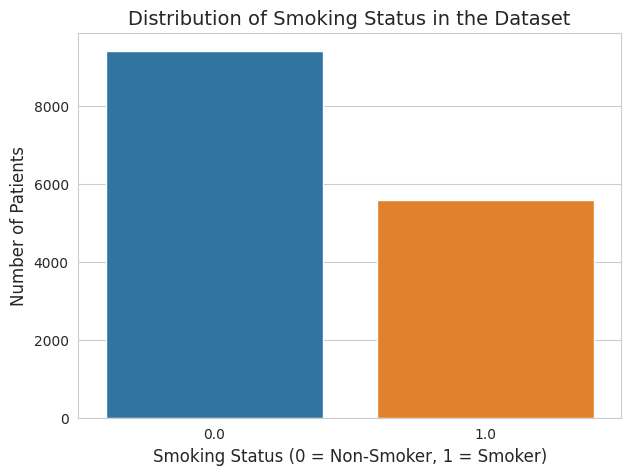

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
print("--- Counts of Smoking Status ---")
smoking_counts = train_df['smoking'].value_counts()
print(smoking_counts)
print("\n--- Displaying Plot ---")
plt.figure(figsize=(7, 5)) 
sns.countplot(x='smoking', data=train_df)
plt.title('Distribution of Smoking Status in the Dataset', fontsize=14)
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

--- Creating plots to compare smokers and non-smokers ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

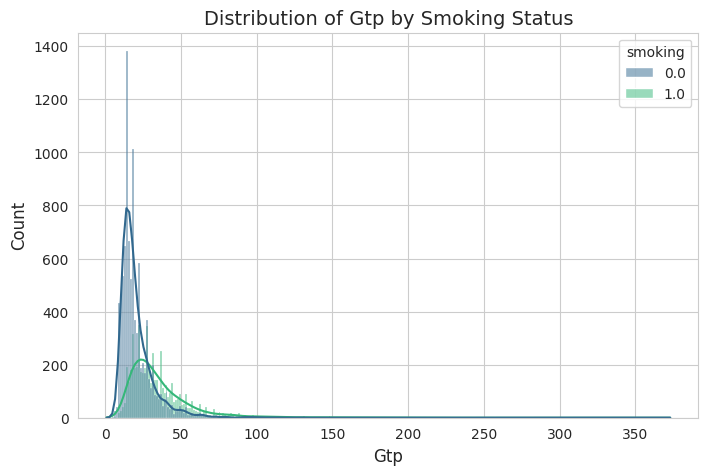

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

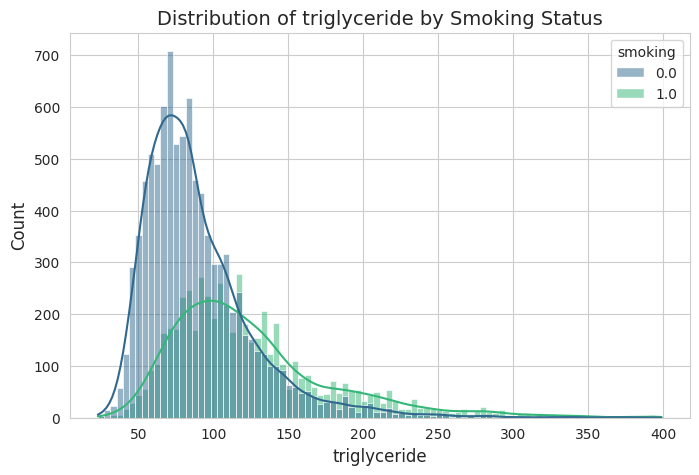

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

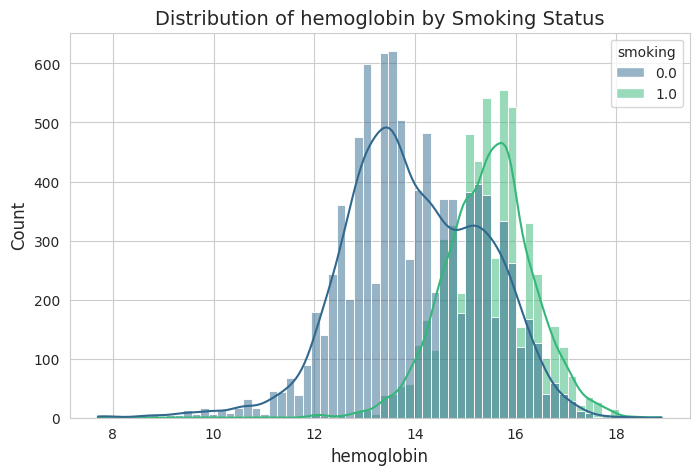


--- Plots displayed ---


In [5]:
features_to_plot = ['Gtp', 'triglyceride', 'hemoglobin']
print("--- Creating plots to compare smokers and non-smokers ---")
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=feature, hue='smoking', kde=True, palette='viridis')
    
    plt.title(f'Distribution of {feature} by Smoking Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

print("\n--- Plots displayed ---")

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
train_df = pd.read_csv('/kaggle/input/ieee-ras-data-science-recruitments-25-26-round-1/train.csv')
test_df = pd.read_csv('/kaggle/input/ieee-ras-data-science-recruitments-25-26-round-1/test.csv')
test_ids = test_df['id']
train_df = train_df.drop('id', axis=1) 
test_df = test_df.drop('id', axis=1)
print("--- Dataframes after dropping 'id' column ---")
print("Train DF columns:", train_df.columns)
print("Test DF columns:", test_df.columns)
X = train_df.drop('smoking', axis=1)
y = train_df['smoking']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n--- Shapes of the final datasets ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"Test data shape: {test_df.shape}")

--- Dataframes after dropping 'id' column ---
Train DF columns: Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')
Test DF columns: Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

--- Shapes of the final datasets ---
X_train shape: (12000, 22)
y_train shape: (12000,)
X_val shape: (3000, 22)
y_val shape: (3000,)
Test data shape: (10000, 22)


In [7]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
print("--- Training the Logistic Regression model... ---")
model.fit(X_train, y_train)
print("--- Model training complete! ---")


--- Training the Logistic Regression model... ---
--- Model training complete! ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Making predictions on the validation data... ---")
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"\n--- Model Accuracy ---")
print(f"The accuracy of our model on the validation set is: {accuracy:.4f}")
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_val, y_pred, labels=[1, 0])
print(cm)
print("\nHere's how to read the matrix:")
print("[[True Positives (Correctly ID'd Smokers), False Negatives (Smokers ID'd as Non-Smokers)]]")
print("[[False Positives (Non-Smokers ID'd as Smokers), True Negatives (Correctly ID'd Non-Smokers)]]")
print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred))

--- Making predictions on the validation data... ---

--- Model Accuracy ---
The accuracy of our model on the validation set is: 0.7677

--- Confusion Matrix ---
[[ 726  390]
 [ 307 1577]]

Here's how to read the matrix:
[[True Positives (Correctly ID'd Smokers), False Negatives (Smokers ID'd as Non-Smokers)]]
[[False Positives (Non-Smokers ID'd as Smokers), True Negatives (Correctly ID'd Non-Smokers)]]

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1884
         1.0       0.70      0.65      0.68      1116

    accuracy                           0.77      3000
   macro avg       0.75      0.74      0.75      3000
weighted avg       0.76      0.77      0.77      3000



In [9]:
print("--- Making final predictions on the test dataset... ---")
test_predictions = model.predict(test_df)
print("First 10 predictions:", test_predictions[:10])

--- Making final predictions on the test dataset... ---
First 10 predictions: [0. 0. 1. 1. 1. 0. 1. 1. 1. 0.]


In [10]:
submission_df = pd.DataFrame({
    'id': test_ids,
    'smoking': test_predictions
})

In [11]:
print("\n--- First 5 rows of our submission dataframe ---")
print(submission_df.head())


--- First 5 rows of our submission dataframe ---
      id  smoking
0  15000      0.0
1  15001      0.0
2  15002      1.0
3  15003      1.0
4  15004      1.0


In [12]:
submission_df.to_csv('submission.csv', index=False)
print("\n--- 'submission.csv' file has been created successfully! ---")


--- 'submission.csv' file has been created successfully! ---
